In [ ]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt 
import requests
import math
from google.colab import data_table
data_table.enable_dataframe_formatter()
from sklearn.linear_model import LinearRegression
from pandas_datareader import data as pdr
yf.pdr_override()

In [ ]:
# Arquivos desatualizados , isso gera erros na leitura do Yfinance , mas nao compromete o data.
# depois pesquisar por um arquino mais recente
from google.colab import files
uploaded =files.upload()

In [ ]:
import io
sp500 = pd.read_csv(io.BytesIO(uploaded['sp500.csv']))
nasdaq = pd.read_csv(io.BytesIO(uploaded['nasdaq100.csv']))

In [ ]:
# coleta de dados
# desconsiderar erros na leitura por enquanto gerados por repair = true e listas desatualizadas.
# retirei o Bovespa da lista de teste devido a seus altos valores em relacao a acao.
#ticksp500= list(sp500['Symbol'])
#ticknasdaq= list(nasdaq['Symbol'])
tickers =['ARZZ3.SA','CXSE3.SA','RADL3.SA','VBBR3.SA','VIVT3.SA','PETR4.SA','B3SA3.SA','KLBN11.SA',
          'TOTS3.SA' , 'UNIP6.SA', 'HYPE3.SA','INTB3.SA','ITUB4.SA','TRPL4.SA','WEGE3.SA','VALE3.SA','ELET3.SA','^BVSP']
inicio = '2022-01-03'
fim = '2023-05-15'
periodo = 21
Desvio = 3
First = yf.download(tickers,interval='1d',start=inicio,end=fim,repair = True)
#Firstsp = yf.download(ticksp500,interval='1d',start=inicio,end=fim,repair = True)
#Firstnasdaq =yf.download(ticknasdaq,interval='1d',start=inicio,end=fim,repair = True)

[********************* 44%                       ]  8 of 18 completedKLBN11.SA: fixed 6/6 value=0 errors in 1d price data
[**********************89%******************     ]  16 of 18 completed^BVSP: No data found for this date range, symbol may be delisted
YF: WARNING: Cannot reconstruct because Yahoo not returning data in interval
[*********************100%***********************]  17 of 18 completed

1 Failed download:
- ^BVSP: No data found for this date range, symbol may be delisted
^BVSP: fixed 87/87 value=0 errors in 15m price data
^BVSP: fixed 15/93 value=0 errors in 30m price data


In [ ]:
First.head()



Adj Close                                                        \
             ARZZ3.SA   B3SA3.SA  CXSE3.SA   ELET3.SA   HYPE3.SA   INTB3.SA   
Date                                                                          
2022-01-03  70.492134  10.237952  7.096405  31.793657  26.438906  26.059147   
2022-01-04  68.413376  10.457609  7.043643  31.111601  26.294430  25.154182   
2022-01-05  65.124466  10.237952  6.902946  30.984930  25.822479  24.220022   
2022-01-06  66.315102  10.486259  6.946914  30.936214  26.092165  23.276129   
2022-01-07  65.788101  10.734569  7.026056  29.581842  26.284800  23.353977   

                                                        ...    Volume  \
             ITUB4.SA  KLBN11.SA   PETR4.SA   RADL3.SA  ... KLBN11.SA   
Date                                                    ...             
2022-01-03  20.368019  22.839647  15.137723  22.904076  ...   4194100   
2022-01-04  20.945635  23.267054  15.194964  23.002590  ...   5943000   
2022-01-05  20.547932  22.830742  14.606938  21.938656  ...   5054700   
2022-01-06  20.964573  22.848551  14.596532  21.475651  ...   5257900   
2022-01-07  21.428553  22.465660  14.664181  21.160412  ...   3335300   

                                                                              \
            PETR4.SA  RADL3.SA TOTS3.SA TRPL4.SA UNIP6.SA  VALE3.SA VBBR3.SA   
Date                                                                           
2022-01-03  52704700   7165000  5585200   943600   292600  18557200  7653000   
2022-01-04  51739200   4587800  4411900  1036200   384340  18178700  9306400   
2022-01-05  78459800   8364000  6063700   921000   395120  22039000  9412900   
2022-01-06  61163100  10849500  6944800  1012500   396550  22044100  9043900   
2022-01-07  47507600  10322300  4759200   733900   249480  35213100  6700300   

                              
           VIVT3.SA WEGE3.SA  
Date                          
2022-01-03  1964600  5475700  
2022-01-04  1586200  4485400  
2022-01-05  2388800  8402200  
2022-01-06  1743800  6043900  
2022-01-07  1697000  6155500  

[5 rows x 102 columns]

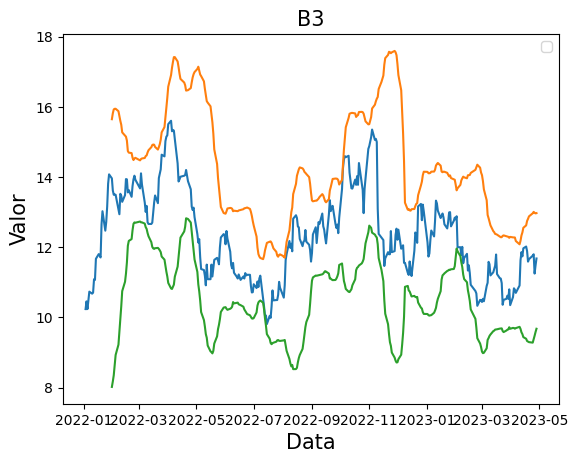

In [ ]:
# Grafico Bollinger  B3SA3.SA
First['Desvio']= First['Adj Close']['B3SA3.SA'].rolling(periodo).std()
First['MM']= First['Adj Close']['B3SA3.SA'].rolling(periodo).mean()
First['Banda_Sup'] = First['MM']+(First['Desvio']* Desvio)
First['Banda_Inf'] = First['MM']-(First['Desvio']* Desvio)
plt.plot(First['Adj Close']['B3SA3.SA'])
plt.plot(First['Banda_Sup'])
plt.plot(First['Banda_Inf'])
plt.xlabel('Data',fontsize=15)
plt.ylabel('Valor', fontsize = 15)
plt.title('B3', fontsize=15)
plt.legend()



In [ ]:
#calculo errado , passar p proxima celula
import yfinance as yf
import pandas as pd
import math

# ação a ser analisada
ticker = "^BVSP"

# download do dataframe
df = yf.download(ticker, period='100d' , interval='1d')

# seleciona apenas a coluna de fechamento
df = df.loc[:, ['Close']]

# cálculo da média, variância e desvio padrão
media = sum(df['Close'])/len(df['Close'])

diferencas = [(p - media) for p in df['Close']]

quadrados = [d ** 2 for d in diferencas]

variancia = sum(quadrados)/(len(df['Close']) - 1)

desvio_padrao = math.sqrt(variancia)

# cálculo dos retornos diários
df['Retornos Diários'] = df['Close'].pct_change()

# criação de um novo dataframe para armazenar as informações em suas respectivas colunas
df_stats = pd.DataFrame({
    'Média': [media],
    'Variância': [variancia],
    'Desvio Padrão': [desvio_padrao],
    'Retornos Diários Médios': [df['Retornos Diários'].mean()]
})

# impressão dos resultados
print(f'Variância: {variancia:.2f}')
print(f'Desvio Padrão: {desvio_padrao:.2f}')

print(df)
print(df_stats)

# salvar dataframes em arquivos csv
df.to_csv('precos.csv')
df_stats.to_csv('estatisticas.csv')


[*********************100%***********************]  1 of 1 completed
Variância: 14955714.02
Desvio Padrão: 3867.26
               Close  Retornos Diários
Date                                  
2022-12-09  107689.0               NaN
2022-12-12  105264.0         -0.022519
2022-12-13  103892.0         -0.013034
2022-12-14  103803.0         -0.000857
2022-12-15  103738.0         -0.000626
...              ...               ...
2023-04-28  104432.0          0.014661
2023-05-02  101927.0         -0.023987
2023-05-03  101797.0         -0.001275
2023-05-04  102174.0          0.003703
2023-05-05  105148.0          0.029107

[100 rows x 2 columns]
       Média     Variância  Desvio Padrão  Retornos Diários Médios
0  106243.83  1.495571e+07    3867.261825                -0.000156


In [ ]:
# Metodo certo mas nao seguiu o padrao notebook , quando gerar arquivo .py pode conter erros , bom corrigir
# recomendo passar p proxima celula
import pandas as pd
import yfinance as yf

# lista de ativos para análise
tickers = ['^BVSP','ARZZ3.SA','CXSA3.SA','RADL3.SA','VBBR3.SA','VIVT3.SA','PETR4.SA','B3SA3.SA','KLBN11.SA',
          'TOTS3.SA' , 'UNIP6.SA', 'HYPE3.SA','INTB3.SA','ITUB4.SA','TRPL4.SA','WEGE3.SA','VALE3.SA','ELET3.SA']

# cria um dataframe para armazenar as informações de cada ativo
df_returns = pd.DataFrame()

# loop pelos ativos e coleta informações de retornos diários
for ticker in tickers:
    # coleta dados do ativo
    data = yf.download(ticker, period='331d' , interval='1d')
    # calcula os retornos diários
    returns = data["Adj Close"].pct_change().mul(100)
    # adiciona a coluna de retornos ao dataframe de retornos
    df_returns[ticker] = returns

# cria um dataframe para armazenar as informações de estatísticas
df_stats = pd.DataFrame(columns=["Ativo", "Média", "Variância", "Desvio Padrão"])

# loop pelos ativos e coleta informações de estatísticas
for ticker in tickers:
    # coleta os retornos diários do ativo
    returns = df_returns[ticker]
    # calcula a média, variância e desvio padrão dos retornos
    media = returns.mean()
    variancia = returns.var()
    desvio_padrao = returns.std()
    # adiciona as informações de estatísticas ao dataframe
    df_stats.loc[len(df_stats)] = [ticker, media, variancia, desvio_padrao]

# exibe os dataframes de retornos e estatísticas
print("Retornos Diários")
print(df_returns)
print("\nEstatísticas")
print(df_stats)

df_returns.round(2).to_csv('retornos.csv')
df_stats.round(2).to_csv('estatisticas.csv')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CXSA3.SA: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%*******

In [ ]:
# teste de calculo 

First['Returns'] = First['Adj Close']['VBBR3.SA'].pct_change().mul(100)
Media= First['Returns'].mean()
print ( 'Média',Media)
print ('Variância',(np.var(First['Returns'])))
print ('Desvio Padrão',np.std(First['Returns']))
# O teste apresentou erro em PETR4 , a psssibilidade é erro na base de dados.
# O projeto poderia usar duas fontes de dados.

Média -0.08913159927884765
Variância 5.515731980258979
Desvio Padrão 2.348559554335163


In [ ]:
# cria matriz de correlação
Firstcorr = First['Adj Close'].corr()

In [ ]:
# preciso do campo Marketcap representa o valor que a empresa é negociada no mercado
# usando metodo .loc
Close = pd.DataFrame({
    'Close'
    'Média': [media],
    'Variância': [variancia],
    'Desvio Padrão': [desvio_padrao],
    '%Change': [%Change],
})
Close['Close'] = First.loc[:,'Close'].copy()
Close.describe()




,ARZZ3.SA,B3SA3.SA,CXSE3.SA,ELET3.SA,HYPE3.SA,INTB3.SA,ITUB4.SA,KLBN11.SA,PETR4.SA,RADL3.SA,TOTS3.SA,TRPL4.SA,UNIP6.SA,VALE3.SA,VBBR3.SA,VIVT3.SA,WEGE3.SA
count,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000
mean,81.296287,12.597964,8.268234,40.287754,39.924940,28.776228,25.520539,20.951467,29.250389,22.660928,28.851707,23.521617,89.923451,81.516707,18.008832,44.269970,33.251347
std,10.472227,1.378504,0.703559,5.398423,5.194005,3.147145,1.808847,2.261865,3.777735,1.829710,3.004562,1.212655,10.222989,9.252282,3.015645,5.188801,5.086705
min,59.500000,10.030000,6.640000,29.480000,26.709999,22.120001,21.510000,17.799999,21.469999,18.190001,23.200001,21.400000,62.020000,62.919998,12.330000,35.660000,22.830000
25%,74.152498,11.555000,7.862500,34.655001,37.262499,26.410000,24.110001,19.262500,25.915000,21.955000,26.682500,22.692501,84.012501,73.235001,15.557500,39.572500,29.402500
50%,80.920002,12.410000,8.315000,41.645000,40.475000,29.005000,25.464999,20.240000,29.804999,22.880000,28.585000,23.440001,90.586361,82.470001,17.575000,42.270000,32.385000
75%,88.865000,13.572500,8.767500,44.679999,43.955001,31.087500,26.547500,22.355000,32.437499,23.770000,30.467499,24.127500,96.781820,88.232498,19.875000,48.852499,38.400002
max,104.500000,16.139999,9.990000,51.570000,50.810001,36.520000,31.059999,26.600000,37.720001,26.600000,37.500000,26.830000,114.839996,105.070000,24.540001,55.349998,41.860001


<ipython-input-13-a0351822600c>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


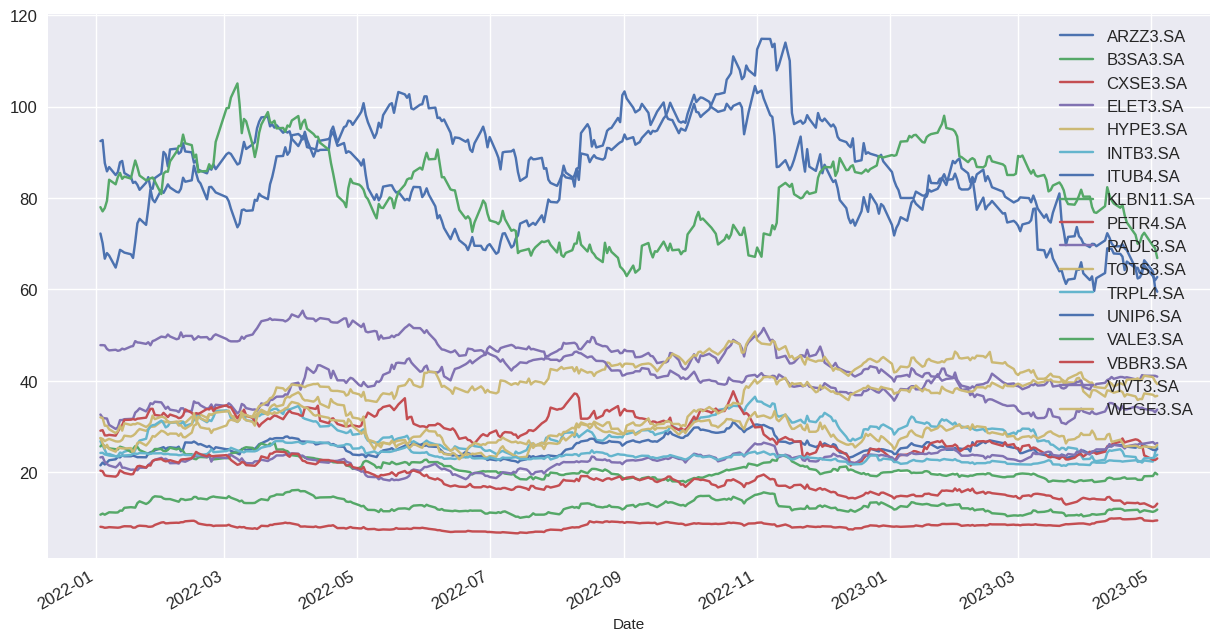

In [ ]:
plt.style.use('seaborn')
Close.plot(figsize = (15,8),fontsize = 12)
plt.legend(fontsize = 12)

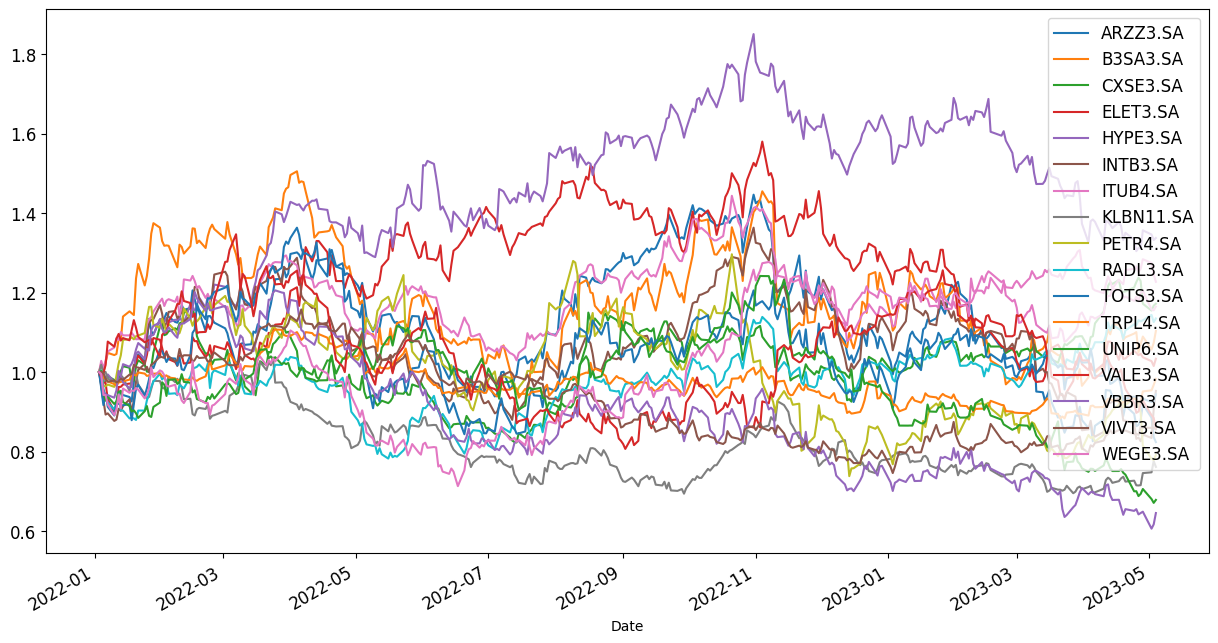

In [ ]:
# normalizando base
Normclose = Close.div(Close.iloc[0])
Normclose.plot(figsize = (15,8),fontsize = 12)
plt.legend(fontsize = 12)

In [ ]:

Close.shift(periods=1)


,ARZZ3.SA,B3SA3.SA,CXSE3.SA,ELET3.SA,HYPE3.SA,INTB3.SA,ITUB4.SA,KLBN11.SA,PETR4.SA,RADL3.SA,TOTS3.SA,TRPL4.SA,UNIP6.SA,VALE3.SA,VBBR3.SA,VIVT3.SA,WEGE3.SA
Date,,,,,,,,,,,,,,,,,
2022-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-04,72.230003,10.72,8.07,32.630001,27.450001,26.780001,21.510000,25.650000,29.090000,23.250000,27.500000,24.230000,92.454544,78.000000,20.350000,47.810001,32.020000
2022-01-05,70.099998,10.95,8.01,31.930000,27.299999,25.850000,22.120001,26.129999,29.200001,23.350000,26.389999,24.260000,92.690910,77.080002,20.230000,47.810001,31.860001
2022-01-06,66.730003,10.72,7.85,31.799999,26.809999,24.889999,21.700001,25.639999,28.070000,22.270000,25.219999,23.900000,87.663635,77.809998,19.340000,47.750000,30.180000
2022-01-07,67.949997,10.98,7.90,31.750000,27.090000,23.920000,22.139999,25.660000,28.049999,21.799999,26.000000,23.790001,85.827271,79.379997,19.209999,46.980000,30.170000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-27,62.630001,11.25,9.99,34.020000,36.029999,22.370001,25.340000,18.330000,26.750000,26.290001,25.370001,22.350000,63.599998,70.269997,13.060000,40.250000,40.110001
2023-04-28,63.529999,11.48,9.92,34.139999,36.000000,22.120001,25.790001,18.350000,26.100000,26.219999,25.440001,22.469999,64.099998,71.760002,13.130000,41.250000,40.349998
2023-05-02,66.379997,11.68,9.46,33.849998,37.250000,22.570000,25.920000,19.129999,23.700001,26.280001,25.660000,23.049999,65.250000,72.400002,13.200000,41.119999,41.119999


In [ ]:
Close.head()

,ARZZ3.SA,B3SA3.SA,CXSE3.SA,ELET3.SA,HYPE3.SA,INTB3.SA,ITUB4.SA,KLBN11.SA,PETR4.SA,RADL3.SA,TOTS3.SA,TRPL4.SA,UNIP6.SA,VALE3.SA,VBBR3.SA,VIVT3.SA,WEGE3.SA
Date,,,,,,,,,,,,,,,,,
2022-01-03,72.230003,10.72,8.07,32.630001,27.450001,26.780001,21.510000,25.650000,29.090000,23.250000,27.500000,24.230000,92.454544,78.000000,20.350000,47.810001,32.020000
2022-01-04,70.099998,10.95,8.01,31.930000,27.299999,25.850000,22.120001,26.129999,29.200001,23.350000,26.389999,24.260000,92.690910,77.080002,20.230000,47.810001,31.860001
2022-01-05,66.730003,10.72,7.85,31.799999,26.809999,24.889999,21.700001,25.639999,28.070000,22.270000,25.219999,23.900000,87.663635,77.809998,19.340000,47.750000,30.180000
2022-01-06,67.949997,10.98,7.90,31.750000,27.090000,23.920000,22.139999,25.660000,28.049999,21.799999,26.000000,23.790001,85.827271,79.379997,19.209999,46.980000,30.170000
2022-01-07,67.410004,11.24,7.99,30.360001,27.290001,24.000000,22.629999,25.230000,28.180000,21.480000,25.100000,23.660000,86.772728,84.000000,19.170000,46.660000,29.410000


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Beta da ação VALE3.SA: 0.85


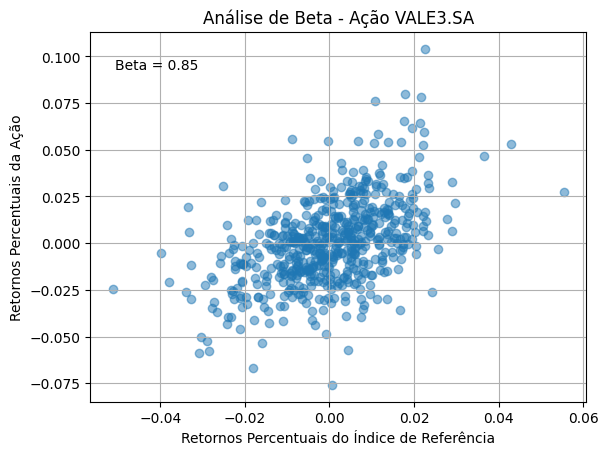

In [ ]:



# Define as datas de início e fim para os dados históricos
start_date = '2021-01-01'
end_date = '2023-05-15'

# Obtém os dados históricos da ação e do índice de referência (no exemplo, o S&P 500)
ticker = 'VALE3.SA' # símbolo da ação
index_ticker = '^BVSP' # símbolo do índice de referência
stock_data = yf.download(ticker, start=start_date, end=end_date)['Adj Close']
index_data = yf.download(index_ticker, start=start_date, end=end_date)['Adj Close']

# Calcula os retornos percentuais diários da ação e do índice de referência
stock_returns = stock_data.pct_change()[1:]
index_returns = index_data.pct_change()[1:]

# Remove valores ausentes
stock_returns = stock_returns.dropna()
index_returns = index_returns.dropna()

# Ajusta os dados para a regressão linear
X = np.array(index_returns).reshape(-1, 1)
Y = np.array(stock_returns)

# Cria e ajusta o modelo de regressão linear
regression = LinearRegression()
regression.fit(X, Y)

# Obtém o beta a partir do coeficiente angular da regressão
beta = regression.coef_[0]
print(f'Beta da ação {ticker}: {beta:.2f}')
# Plota um gráfico dos retornos percentuais da ação em relação aos retornos percentuais do índice de referência
plt.scatter(index_returns, stock_returns, alpha=0.5)
plt.xlabel('Retornos Percentuais do Índice de Referência')
plt.ylabel('Retornos Percentuais da Ação')
plt.title(f'Análise de Beta - Ação {ticker}')
plt.grid(True)

# Adiciona o valor do beta como texto no gráfico
plt.text(0.05, 0.9, f'Beta = {beta:.2f}', transform=plt.gca().transAxes)

plt.show()
